In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
NDIM=2
POP_SIZE=60
LAMBDA_SIZE=120

MUTATE_PROBABILITY=0.5
MUTATE_DEVIATION=1

lbound = -6
ubound = 6

In [12]:
def fitness(ind: np.ndarray):
    x = ind[0]
    y = ind[1]
    return (x**2 +y-11)**2 + (x-y**2-7)**2

def generate_population():
    return np.random.uniform(lbound, ubound, size=(POP_SIZE, NDIM))

def mutate(x: np.ndarray):
    x += np.random.normal(0, MUTATE_DEVIATION, size=x.shape)

def crossover(x: np.ndarray, y: np.ndarray):
    alpha = np.random.rand()
    return alpha * x + (1-alpha) * y


In [13]:
ft_x = np.linspace(lbound, ubound, 100)
ft_y = np.linspace(lbound, ubound, 100)
ft_x, ft_y = np.meshgrid(ft_x, ft_y)
ft_z = fitness(np.array([ft_x, ft_y]))

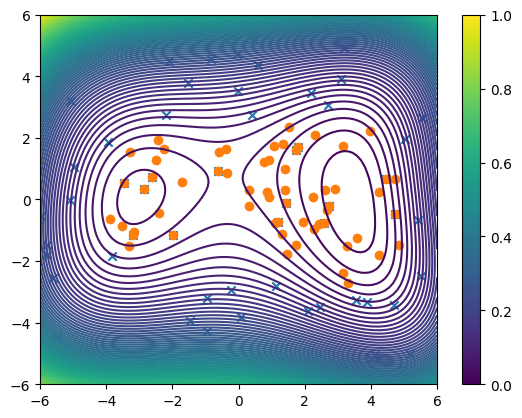

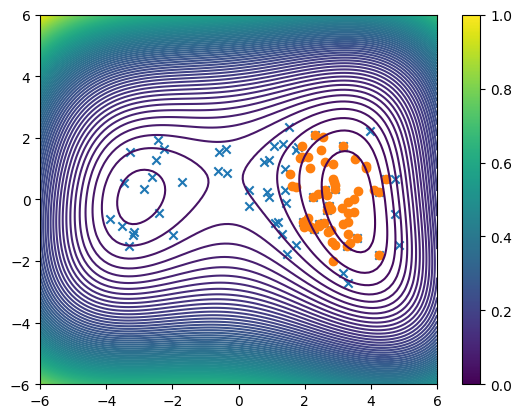

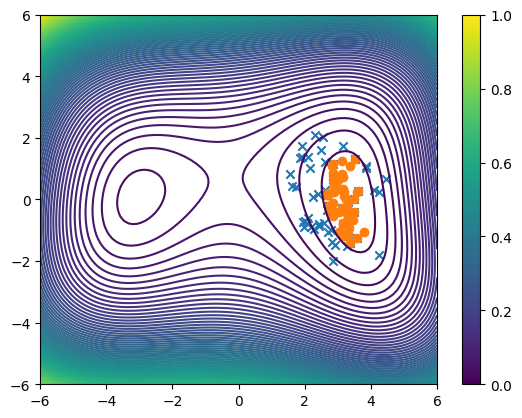

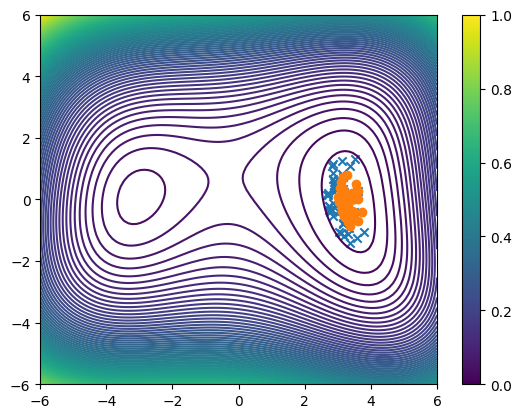

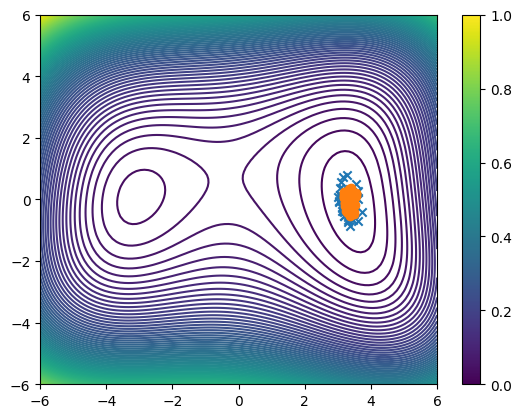

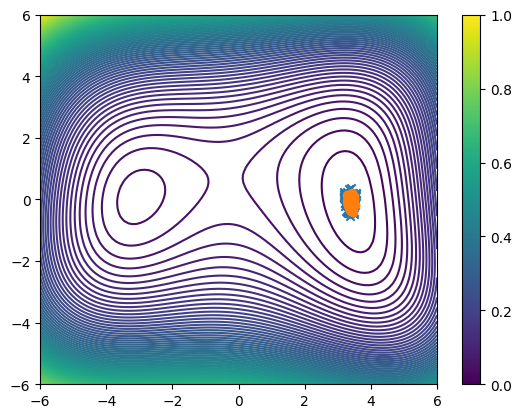

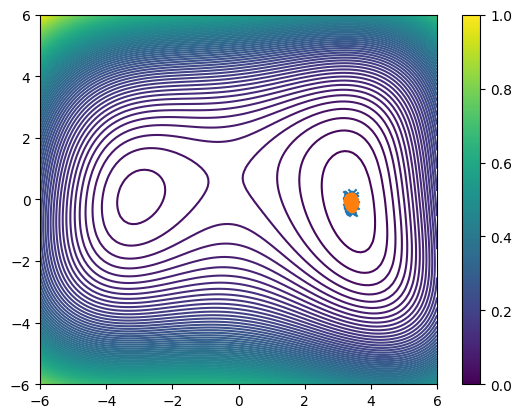

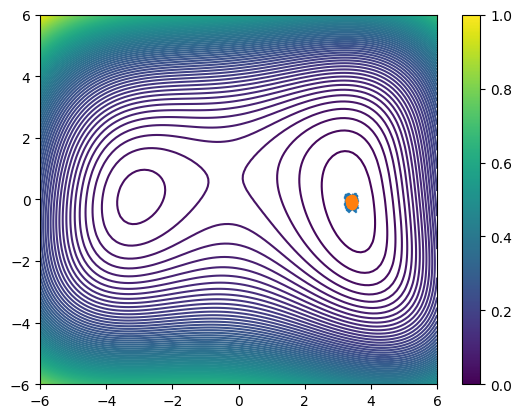

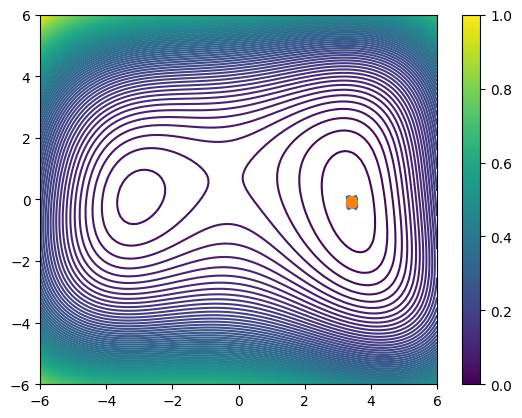

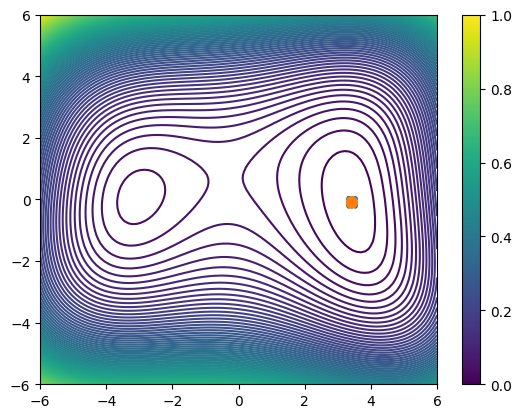

In [14]:
mean = np.array([0, 0])
covar = np.array([[(ubound-lbound), 0], [0, (ubound-lbound)]])

try:
    gen = 1
    population = generate_population()
    while gen <= 10:
        newpop = []
        for _ in range(LAMBDA_SIZE):
            p1, p2 = np.random.choice(POP_SIZE, size=2, replace=False)
            child = crossover(population[p1], population[p2])
            if np.random.rand() < MUTATE_PROBABILITY:
                mutate(child)
            newpop.append(child)
        selected = sorted(newpop + list(population), key=lambda ind: fitness(ind))[:POP_SIZE]
        plt.xlim(lbound, ubound)
        plt.ylim(lbound, ubound)
        plt.contour(ft_x, ft_y, ft_z, levels=100)
        plt.scatter([x[0] for x in population], [y[1] for y in population], marker='x')
        plt.scatter([x[0] for x in selected], [y[1] for y in selected], marker='o')
        plt.colorbar()
        plt.pause(0.5)
        population = np.array(selected)
        gen += 1
    plt.show()
except KeyboardInterrupt:
    print("Exiting!")